# Never Tell Me The Odds:
### An analysis on the discernible popularity of characters in the Star Wars Franchise

### Group Member Names 

- Evan Benton
- Isaac Martinez Camacho
- Reesha Rajen
- Ruben Ramirez
- Valerie Lopez

## Overview

Given our group's mutual interest in the Star Wars extended universe, we hoped to try to incorporate this into a data science project for the quarter. After much ado and discussion, we decided to assess whether or not a character's screentime had a positive correlation with their respective popularity. Scraping data from an online survey consisting of twenty-four (24) characters, we hypothesized that the more familiarized an audience member was with a character, the more likely they were to view the character as `favorable`. Likewise, less familiarized characters would be viewed as `unfavorable`, regardless of their status as an antagonist or protagonist.

### Research Question 

In the Star Wars franchise, does screen-time for a particular character have a positive, measurable effect on their favorability? We define favorability as a non-negative ranking of a given character. We seek to measure `screen time` and use survey responses as our primary and only determination of `favorability`.

Type of analysis: *inferential analysis.*

### Background and Prior Work 

With the December 2019 release of the new Star Wars film in the sequel trilogy, *The Rise of Skywalker* and the rising popularity of the franchise due to the Walt Disney Company's aquisition of Lucasfilm, our group decided to look into the popularity of Star Wars. More specifically, we sought to look at the popularity of each character, and analyze if there exists a positive correlation between ***screen-time*** and ***popularity of the characters among fans***.

We began an online cursory search by seeking data on the films. This yielded a few sites that might be of use. Since the rights to the franchise were purchased by Disney in the year 2012, the popularity of the films skyrocketed as Lucasfilm now had a wider audience, and was inherently more accessible. According to *Statista*, Star Wars is "one of the most talked-about movies on social media worldwide as of April 2018" (Watson, 2019). *Statista* also includes data on `The Most Popular Star Wars Character`, which we hoped to use in comparison with to each characters’ screen time.

*IMDb*, or the Internet Movie Database, provides a neat list of the screen time for each character from every Star Wars film. Furthermore, the times listed on this site are for how long a character is visible on-screen, to the quarter-minute, regardless of whether they have dialogue or not. It is noteworthy to mention that the list does not provide total screen-time across all movies, and we anticipate calculating these values ourselves.

References:
- https://www.statista.com/topics/4362/star-wars/
- https://www.statista.com/statistics/305215/star-wars-favorite-character-usa/
- https://www.imdb.com/list/ls027631145/



### Hypothesis 

We expect that characters that have the highest screentime will also have the highest degree of favorability. In other words, we hypothesize that there exists a positive correlation between favorability and screentime. Regardless of whether a character is a main antagonist or protagonist, having a high screentime would imply that the character is simply easiest to recognize. Noting the psychology of humans, familiarity can yield favorability.

### Data and Datasets

The dataset we used comes from a National Tracking Poll conducted in 2017 by *Morning Consult*, conducted from December 1st through December 4th in 2017. It is noteworthy that this poll corresponded with the month of release of the second film in the Star Wars sequel trilogy, during which time Walt Disney Studios Motion Pictures was responsible for the distribution of the films, rather than Lucasfilm.

The poll was conducted among a national sample of 2,200 adults. Interviews took place online, and results from the full survey have a margin of error of +/- 2 percentage points. 

The respondents were asked to indicate if they had a favorable or unfavorable impression of a set of characters from the Star Wars universe. These responses range as the following:
- Very favorable
- Somewhat favorable
- Somewhat unfavorable
- Very unfavorable
- Heard Of, No Opinion
- Never Heard Of

We made the decision to classify degrees of variation within a specific category as the same. For example, `Very Favorable` and `Somewhat Favorable` were both categorized as `Favorable`. `Somewhat Unfavorable` and `Very Unfavorable` were both categorized as `Unfavorable`.

There were also a multitude of demographics surveyed, ranging from Adults, to Gender: Male, Gender: Female, differing age/generational brackets, different political leanings, levels of education, income, ethnicity, religion, the type of community the respondent resides in, type of employment, region of the United States, and political candidate picks in the previous two elections. We disregarded most of these demographics, focusing on the first three: `Adult`, `Gender: Male`, and `Gender: Female`.

The source of our dataset can be found **here**, from Morning Consult itself:
- https://morningconsult.com/wp-content/uploads/2017/12/171116_crosstabs_BRANDS_v1_DK-2.pdf

## Data Analysis

Begin by importing any necessary libraries.

In [37]:
# Imports 
%matplotlib inline

from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

Load CSV files accordingly for our corresponding data.

In [9]:
charactersDF = pd.read_csv("Star Wars Respondent Demographics - Sheet1.csv")
screentimeDF = pd.read_csv("Star Wars Characters By Screentime - Sheet1.csv")
charactersDF

,Character,Surveyed Demographic,Total Favorable,Very Favorable,Somewhat Favorable,Total Unfavorable,Somewhat Unfavorable,Very Unfavorable,Total No Opinion,"Heard Of, No Opinion",Never Heard Of,Total N
0,Han Solo,Adults,1490,1059,431,90,58,32,621,350,271,2200
1,Han Solo,Gender: Male,804,603,201,53,40,13,202,118,84,1059
2,Han Solo,Gender: Female,685,456,229,36,17,19,419,231,188,1141
3,Luke Skywalker,Adults,1590,1122,468,91,60,31,519,385,134,2200
4,Luke Skywalker,Gender: Male,829,614,215,44,34,10,185,124,61,1059
...,...,...,...,...,...,...,...,...,...,...,...,...
67,BB-8,Gender: Male,512,306,206,100,76,24,447,165,282,1059
68,BB-8,Gender: Female,352,220,132,51,30,21,738,207,531,1141
69,Snoke,Adults,558,259,299,361,211,150,1282,413,869,2200
70,Snoke,Gender: Male,386,191,195,218,121,97,454,165,289,1059


### Exploratory Data Analysis

**Structure**: Our data is a CSV file, making it tabular in nature. Unfortunately we were not able to find a dataset with a separate row for each observation -- nor would we want to -- as a lot of our data reaches into the 1000s and each character has a different number of observations. We decided it would be best to make each row a character and then put the observations into a number format that we could later take as a percentage. We have different columns that explain the demographic: the number of people who like the character, dislike the character, have never heard of, or have no opinion of the character, as well as total number of people counted. We also have another dataset that shows the runtime of each character per movie, per trilogy. Luckily, we only need one column of that dataset -- the total runtime of a given character -- such that we can merge this data to the main dataframe. 

**Granularity**: As mentioned above, we can not take each person as an observation and so we had to move the data into a different format where we could take the number of observations for each character. Each observation represents how their "likeability" or popularity of each Star Wars character.

**Scope**: The likeabilty or popularity of a character based on screentime is what our research questions entails so we need sample data of how people feel about these characters. You will later see how this is represented within our graphs. 

**Temporality**: This dataset was taken in 2017, or 3 years ago and immediately before the second movie of the Sequel Trilogy was released. We note this fact as something that may skew the data -- perhaps people might like the sequel characters more -- or perhaps this has a reverse effect in that older characters may have had more time to saturate within the population and generate more familiarity, which we accost with having more popularity.

**Faithfulness**: For the most part, the dataset values hold `true`. With popularity as a measurable variable, there is most likely to be some sort of bias, as popularity is subjective. We tried to account for this as quantitatively as possible.

### Data Cleaning & Pre-Processing
We decided to keep in the total number of people in the Total N of the survey even though we are not using that specific data because those people are still part of the population and still affects popularity, just not in terms of likeability. 

Here, we drop the redundant `Favorable` and `Unfavorable` columns from our dataframe as well as creating a columns for the percentage of people that like/dislike the character. Slicing the main charactersDF into separate df's to make it easier later on for analysis. Lastly replacing NaN values with 0 in screentimeDF. 

In [10]:
# Drop redundant favorable/unfavorable columns
charactersDF = charactersDF.drop(['Very Favorable', 'Somewhat Favorable', 'Somewhat Unfavorable',
         'Very Unfavorable', 'Total No Opinion', 'Heard Of, No Opinion', 'Never Heard Of'], axis=1)
##charactersDF = charactersDF.drop([21,23])
##charactersDF = charactersDF.reset_index(drop = True, inplace = True)

dropIndex = charactersDF[charactersDF['Character'] == 'Jyn Erso'].index
charactersDF.drop(dropIndex, inplace=True)

charactersDF['%fave'] = round((charactersDF['Total Favorable'] / charactersDF['Total N']), 4)*100
charactersDF['%unfave'] = round((charactersDF['Total Unfavorable'] / charactersDF['Total N']), 4)*100

#slicing and creating character dfs
han_solo = charactersDF[0:3]
luke_skywalker = charactersDF[3:6]
luke_skywalker.reset_index(drop = True, inplace = True)
princess_leia = charactersDF[6:9]
princess_leia.reset_index(drop = True, inplace = True)
kylo_ren = charactersDF[9:12]
kylo_ren.reset_index(drop = True, inplace = True)
rey = charactersDF[12:15]
rey.reset_index(drop = True, inplace = True)
finn = charactersDF[15:18]
finn.reset_index(drop = True, inplace = True)
darth_vader = charactersDF[18:21]
darth_vader.reset_index(drop = True, inplace = True)
obi_wan = charactersDF[21:24]
obi_wan.reset_index(drop = True, inplace = True)
c3p0 = charactersDF[24:27]
c3p0.reset_index(drop = True, inplace = True)
r2d2 = charactersDF[27:30]
r2d2.reset_index(drop = True, inplace = True)
chewbacca = charactersDF[30:33]
chewbacca.reset_index(drop = True, inplace = True)
yoda = charactersDF[33:36]
yoda.reset_index(drop = True, inplace = True)
lando_calrissian = charactersDF[36:39]
lando_calrissian.reset_index(drop = True, inplace = True)
padme_amidala = charactersDF[39:42]
padme_amidala.reset_index(drop = True, inplace = True)
anakin_skywalker = charactersDF[42:45]
anakin_skywalker.reset_index(drop = True, inplace = True)
emperor_palpatine = charactersDF[45:48]
emperor_palpatine.reset_index(drop = True, inplace = True)
jar_jar_binks = charactersDF[48:51]
jar_jar_binks.reset_index(drop = True, inplace = True)
jabba_the_hutt = charactersDF[51:54]
jabba_the_hutt.reset_index(drop = True, inplace = True)
mace_windu = charactersDF[54:57]
mace_windu.reset_index(drop = True, inplace = True)
count_dooku = charactersDF[57:60]
count_dooku.reset_index(drop = True, inplace = True)
boba_fett = charactersDF[60:63]
boba_fett.reset_index(drop = True, inplace = True)
bb8 = charactersDF[63:66]
bb8.reset_index(drop = True, inplace = True)
snoke = charactersDF[66:69]
snoke.reset_index(drop = True, inplace = True)

#Drop NaN values for screentime characters
screentimeDF = screentimeDF.fillna(0)





Calculate the Runtime Percentage per character, based on their total amount of screentime over the total possible runtime. This includes all minutes from the `Prequel`, `Original`, and `Sequel` trilogy.

In [11]:
##variable for the total star wars series runtime
star_wars_runtime = 1221

##function that returns the percentage of the character's runtime
def runtime_perc(value): 
    n = (value/star_wars_runtime)*100 
    n = round(n, 2)
    
    return n

##creating list to apply the runtime_perc function
copy_pasta = screentimeDF['Total Screentime'].apply(runtime_perc)

##creating new column using the previous list
screentimeDF['Runtime Percentage'] = copy_pasta
screentimeDF

,Character,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI,Episode VII,Episode VIII,Episode IX,Total Screentime,Prequel,Original,Sequel,Runtime Percentage
0,Anakin Skywalker,23.50,48.00,52.75,0.00,0.00,0.00,0.00,0.00,0.00,124.25,415,377,429,10.18
1,BB-8,0.00,0.00,0.00,0.00,0.00,0.00,10.75,4.75,6.25,21.75,415,377,429,1.78
2,Boba Fett,0.00,0.00,0.00,0.00,1.75,1.00,0.00,0.00,0.00,2.75,415,377,429,0.23
3,C-3PO,2.00,4.25,2.75,19.25,14.50,13.50,1.75,2.50,9.25,69.75,415,377,429,5.71
4,Chewbacca,0.00,0.00,1.00,11.00,16.50,10.50,8.50,2.00,9.50,59.00,415,377,429,4.83
5,Count Dooku,0.00,9.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.50,415,377,429,0.78
6,Darth Vader,0.00,0.00,0.00,9.25,13.25,14.75,0.00,0.00,0.00,37.25,415,377,429,3.05
7,Finn,0.00,0.00,0.00,0.00,0.00,0.00,31.75,17.50,26.00,75.25,415,377,429,6.16
8,Han Solo,0.00,0.00,0.00,19.50,23.50,17.75,20.50,0.00,1.75,83.00,415,377,429,6.80
9,Jabba the Hutt,0.00,0.00,0.00,0.00,0.00,6.25,0.00,0.00,0.00,6.25,415,377,429,0.51


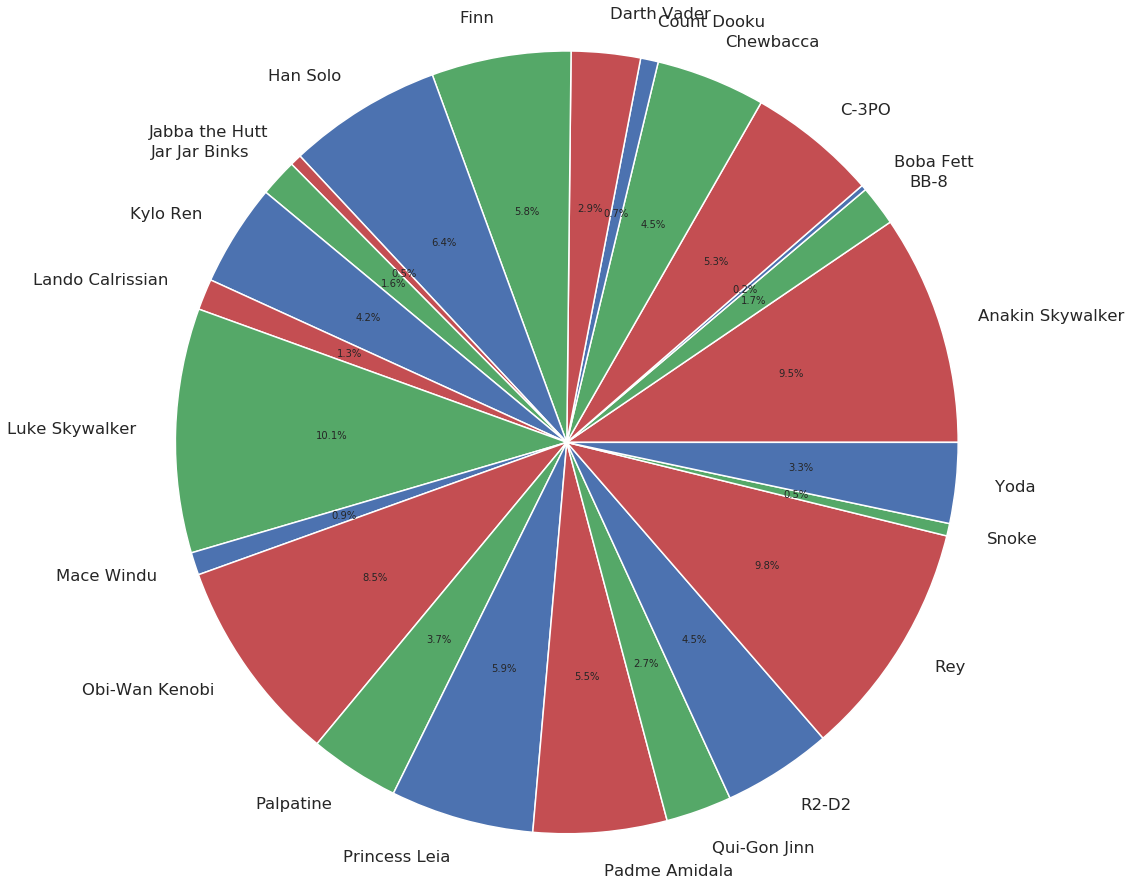

In [12]:
##creating pie chart to represent character's runtimes out of series
labels = screentimeDF['Character']
sizes = screentimeDF['Runtime Percentage']
colors = {k: randint(0, 24) for k in 'rgb'}
plt.pie(sizes, labels = labels, colors = colors, radius = 4.5, autopct = '%1.1f%%') 

char_list = [screentimeDF['Character']]


The pie chart above helps us visualize and display which characters have the most screentime and which characters have the least screentime. We note character `Luke Skywalker` as the character with the highest screentime. We assume that his character would have the highest likeability, in trend with our hypothesis.

In [38]:
##creating function to bar chart all character data
def test_plot(data):
    pos = list(range(len(data['Surveyed Demographic'])))
    width = 0.25

    fig, ax = plt.subplots(figsize = (10, 5))

    name = str(data['Character'][0])
    
    popularity = plt.bar(pos, data['%fave'], width, alpha = 0.5, color = ['royalblue'])
    unpopularity = plt.bar([p + (1.15*width) for p in pos], data['%unfave'], width, alpha = 0.5, color = 'mediumorchid')
    
    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Popularity Among Adults/Gender for ' + name)
    ax.set_xticks([p + 0.48* width for p in pos])
    ax.set_xticklabels(['Adults', 'Adults(Men)', 'Adults(Women)'])
    
    def autolabel(rects): 
        for rect in rects: 
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%2f' % float(height),
            ha='center', va='bottom')
    autolabel(popularity)
    autolabel(unpopularity)

    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, 100])

    plt.legend(['Popularity', 'Unpopularity'], loc = 'upper right')
    plt.grid()
    plt.show()
    return


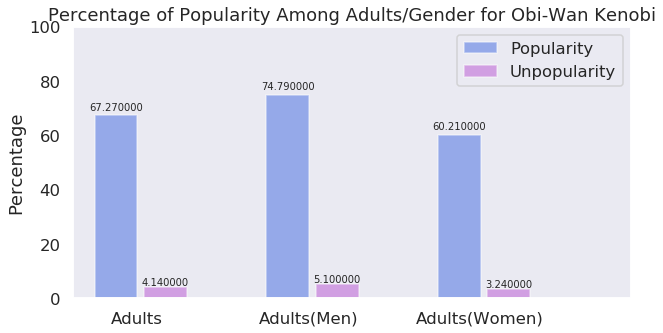

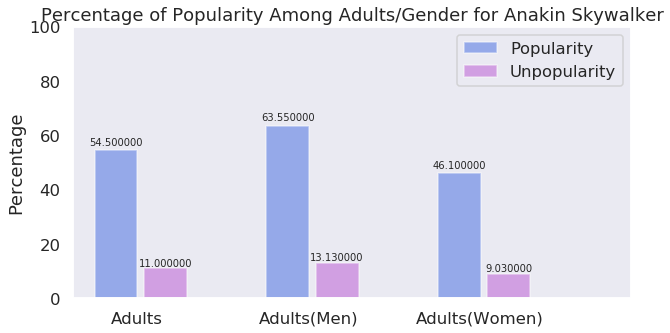

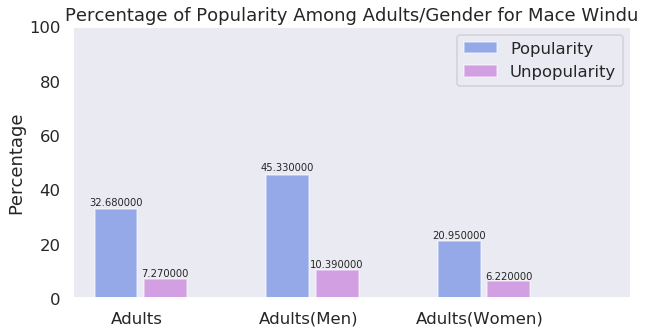

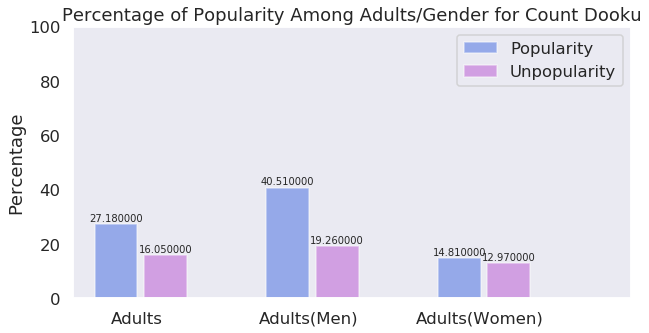

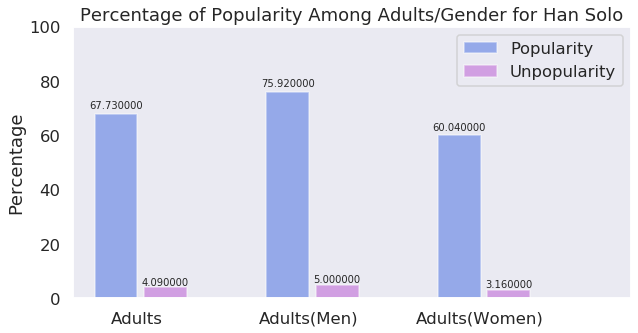

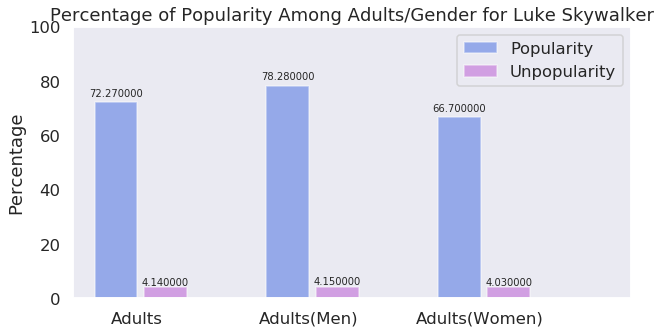

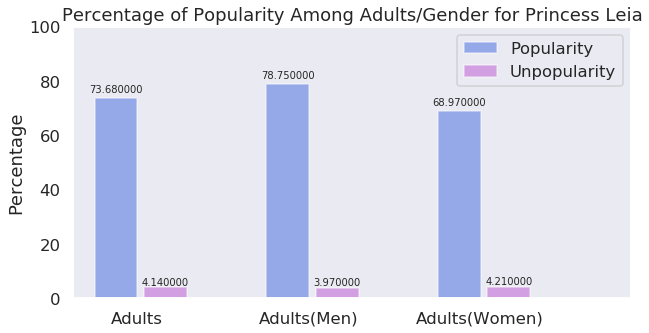

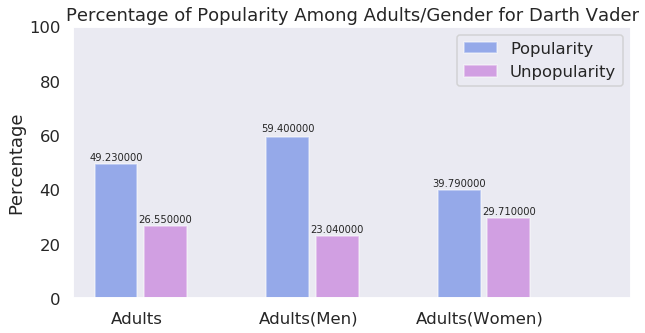

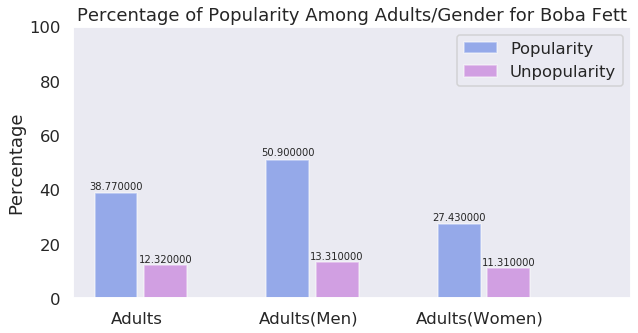

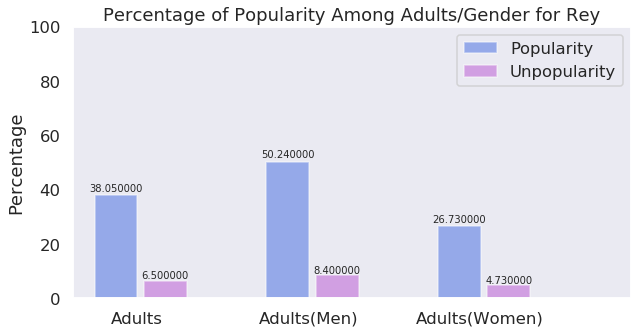

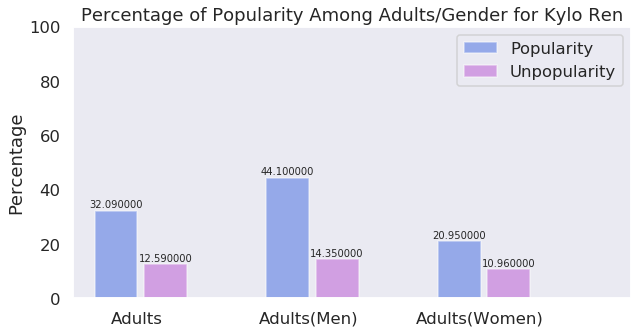

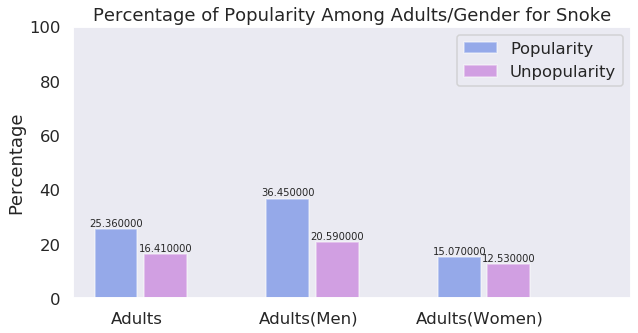

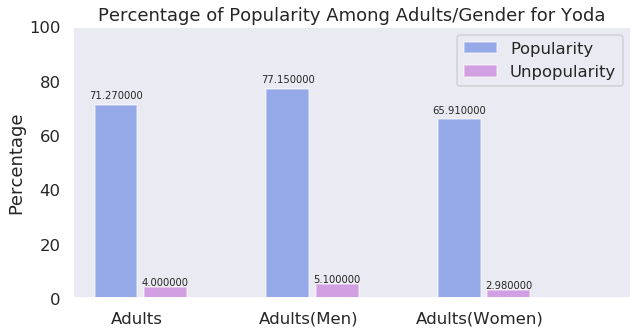

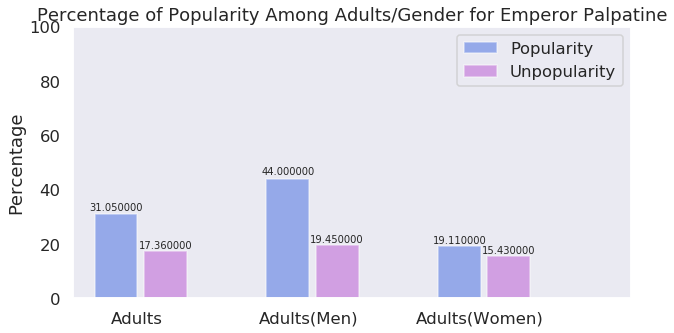

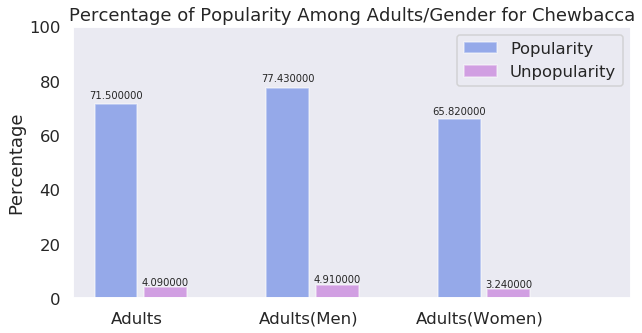

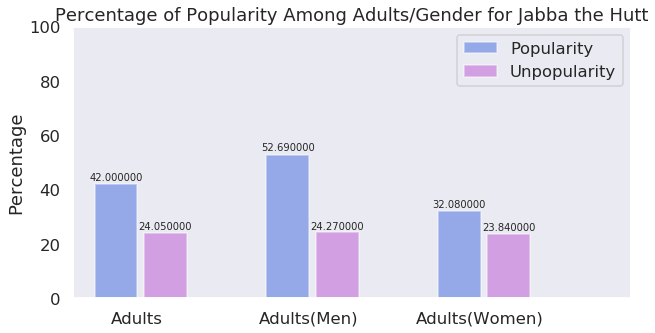

In [28]:
#Prequels
test_plot(obi_wan)
test_plot(anakin_skywalker)
test_plot(mace_windu)
test_plot(count_dooku)

#Original
test_plot(han_solo)
test_plot(luke_skywalker)
test_plot(princess_leia)
test_plot(darth_vader)
test_plot(boba_fett)

#Sequel
test_plot(rey)
test_plot(kylo_ren)
test_plot(snoke)

#All Movies
test_plot(yoda)
test_plot(emperor_palpatine)
test_plot(chewbacca)
test_plot(jabba_the_hutt)

The bar charts display the popularity vs unpopularity of the characters helping us to see which characters are the most popular and which ones are not. 

## Data Analysis

Since our data relies on an inferential analysis, and we seek to predict popularity from character screentime, we decided to use a *linear regression* as our type of analysis. 

In [29]:
##adding runtime percentage to our character's df's so we can do our regression analysis
##Prequels
obi_wan['Runtime Percentage'] = screentimeDF['Runtime Percentage'][15]
padme_amidala['Runtime Percentage'] = screentimeDF['Runtime Percentage'][18]
anakin_skywalker['Runtime Percentage'] = screentimeDF['Runtime Percentage'][0]
jar_jar_binks['Runtime Percentage'] = screentimeDF['Runtime Percentage'][10]
mace_windu['Runtime Percentage'] = screentimeDF['Runtime Percentage'][14]
count_dooku['Runtime Percentage'] = screentimeDF['Runtime Percentage'][5]

#Original
han_solo['Runtime Percentage'] = screentimeDF['Runtime Percentage'][8]
luke_skywalker['Runtime Percentage'] = screentimeDF['Runtime Percentage'][13]
princess_leia['Runtime Percentage'] = screentimeDF['Runtime Percentage'][17]
darth_vader['Runtime Percentage'] = screentimeDF['Runtime Percentage'][6]
lando_calrissian['Runtime Percentage'] = screentimeDF['Runtime Percentage'][12]
boba_fett['Runtime Percentage'] = screentimeDF['Runtime Percentage'][2]

#Sequel
finn['Runtime Percentage'] = screentimeDF['Runtime Percentage'][7]
rey['Runtime Percentage'] = screentimeDF['Runtime Percentage'][21]
kylo_ren['Runtime Percentage'] = screentimeDF['Runtime Percentage'][11]
bb8['Runtime Percentage'] = screentimeDF['Runtime Percentage'][1]
snoke['Runtime Percentage'] = screentimeDF['Runtime Percentage'][22]

#All Movies
c3p0['Runtime Percentage'] = screentimeDF['Runtime Percentage'][3]
r2d2['Runtime Percentage'] = screentimeDF['Runtime Percentage'][20]
yoda['Runtime Percentage'] = screentimeDF['Runtime Percentage'][23]
emperor_palpatine['Runtime Percentage'] = screentimeDF['Runtime Percentage'][16]
chewbacca['Runtime Percentage'] = screentimeDF['Runtime Percentage'][4]
jabba_the_hutt['Runtime Percentage'] = screentimeDF['Runtime Percentage'][9]


In [30]:
##creating a function to read our linear regression analysis for each character, displays favorability then unfavorability first.
def linear_regression_analysis(data):
    data['Runtime Percentage'] = data['Runtime Percentage']
    data['%fave'] = data['%fave']
    data['%unfave'] = data['%unfave']

    ##using character runtime as a predictor for popularity
    x_value_1 = data['Runtime Percentage']
    y_value_1 = data['%fave']
    
    x_value_2 = data['Runtime Percentage']
    y_value_2 = data['%unfave']    

    model_1 = sm.OLS(y_value_1, x_value_1).fit()
    prediction_1 = model_1.predict(x_value_1)
    
    model_2 = sm.OLS(y_value_2, x_value_2).fit()
    prediction_2 = model_2.predict(x_value_2)

    print(model_1.summary())
    print(model_2.summary())
   




Here, we apply the linear regression function generated to our top five (5) characters with the most screentime, as well as the top five (5) characters with the lowest screentime. 

In [31]:
linear_regression_analysis(luke_skywalker)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:30   Log-Likelihood:                -8.9177
No. Observations:                   3   AIC:                             19.84
Df Residuals:                       2   BIC:                             18.93
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage     6.7115      0

In [32]:
linear_regression_analysis(rey)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:30   Log-Likelihood:                -11.042
No. Observations:                   3   AIC:                             24.08
Df Residuals:                       2   BIC:                             23.18
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage     3.6584      0

In [33]:
linear_regression_analysis(anakin_skywalker)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:30   Log-Likelihood:                -10.148
No. Observations:                   3   AIC:                             22.30
Df Residuals:                       2   BIC:                             21.39
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage     5.3749      0

In [13]:
linear_regression_analysis(obi_wan)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        21:38:35   Log-Likelihood:                -9.6086
No. Observations:                   3   AIC:                             21.22
Df Residuals:                       2   BIC:                             20.32
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage     7.4173      0

In [14]:
linear_regression_analysis(han_solo)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        21:38:35   Log-Likelihood:                -9.8649
No. Observations:                   3   AIC:                             21.73
Df Residuals:                       2   BIC:                             20.83
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage     9.9848      0

In [15]:
linear_regression_analysis(boba_fett)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        21:38:35   Log-Likelihood:                -11.037
No. Observations:                   3   AIC:                             24.07
Df Residuals:                       2   BIC:                             23.17
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage   169.7101     29

In [16]:
linear_regression_analysis(jabba_the_hutt)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        21:38:35   Log-Likelihood:                -10.647
No. Observations:                   3   AIC:                             23.29
Df Residuals:                       2   BIC:                             22.39
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage    82.8562     11

In [34]:
linear_regression_analysis(snoke)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:33   Log-Likelihood:                -10.757
No. Observations:                   3   AIC:                             23.51
Df Residuals:                       2   BIC:                             22.61
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage    46.5939     11

In [35]:
linear_regression_analysis(count_dooku)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:33   Log-Likelihood:                -11.309
No. Observations:                   3   AIC:                             24.62
Df Residuals:                       2   BIC:                             23.72
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage    35.2564      9

In [36]:
linear_regression_analysis(mace_windu)

                            OLS Regression Results                            
Dep. Variable:                  %fave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                nan
Time:                        22:02:34   Log-Likelihood:                -11.151
No. Observations:                   3   AIC:                             24.30
Df Residuals:                       2   BIC:                             23.40
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Runtime Percentage    32.9867      7

## Results

Based on the regression analysis of our data, we found that our hypothesis was *incorrect*.

The more screentime a character gets has no discernible effect on popularity -- in fact, this holds quite the opposite. The top five (5) characters with the lowest screentime also had a notably high coefficient of popularity. For example, we note the outlier `Mace Windu`, who only holds approximately 1% of total screentime in the entirety of the Star Wars franchise, yet has a popularity coefficient of `32.99`. In other words, for every 1% of runtime, Mace Windu's popularity went up by 32.99%. We compared this result to the character with the highest screentime, `Luke Skywalker`. It was expected that this character would have a high popularity coefficent, yet Luke Skywalker only had a popularity coefficient of `6.71`.

While this data is non-comprehensive -- meaning that our results do not encompass the entirety of characters in the franchise as a whole -- this leads us to hypothesize that popularity of characters is not related to screentime, or perhaps that the duration of screentime a character has actually has the opposite intended effect on popularity. This is plausible reasoning, as people might get bored of main characters over time, find more criticisms of a character, etc.

## Privacy & Ethics Considerations

It is worth noting that in our project proposal notes that: `Having a project that fairly represents everyone is of high importance and magnitude.` We ensured to stick to our promise without disclosing information that could work against specific demographics, especially historically disinfranchised ones.

We sought to avoid disclosing confidential data or data that would negatively impact specific groups. This is the main reasoning behind our choice to only focus on three demographic groups: `adults`, `males`, and `females`. Anything beyond these demographic groups we deemed irrelevant to what our data analysis required. While we thought of our project as a safe topic -- that is, measuring the correlation of character popularity with screentime -- it did not indicate if the data we used to analyze our question contained inherent biases. As we learned in class, data can inherently contain biases, and humans also carry these biases with them. One could expect audience goers who identify as female to relate to female characters, and vice versa, but this isn't always necessarily the case. People relate to who they deem relatable, and while gender identity has a major role in this, it is not the only role. Like we stated in our project proposal, if we noticed patterns in data that could hurt a specific demographic, we sought to combat  this bias and retreat to either a better data set, or seek to refine our question. Fortunately, our data presents itself in an ethical manner. By looking at three very general groups, we can analyze popularity of a character in a very unbiased way. It is important, as data scientists, to take into account every measure possible in order to ensure our project can be completed with equity and scientific accuracy.

Privacy remained of utmost concern. As we are looking at gender as one of the notable demographics of respondents, we do not seek to reveal any more data beyond this. We refrain from making any correlations between the gender of a character and their popularity with a given demographic. That is, if there *appears* to be a correlation, negative, positive, or otherwise, we deem it merely coincidental. There are a multitude of factors that go into character popularity, and using a generalization to make assumptions is factually incorrect.

Again, having a project that fairly represents everyone was of high importance and magnitude. We are glad the Star Wars universe has worked to include characters that represent diverse backgrounds. This is true in the Original Trilogy, the Prequel Trilogy, and we found this to be the case in the Sequel Trilogy, as well. Being that the survey took place in 2017, many respondents already had familiarity with all characters, male or female.

## Conclusion & Discussion

*There is no discernible effect on popularity of a given character in relation to the screentime that character holds.*

In other words, there exists no positive nor negative correlation between screentime and popularity. It is noteworthy to mention limitations of our dataset, such that we only measured if respondents answered positively, negatively, or had no opinion toward a given character. We neglected other factors of popularity, such as merchandise sales per given characters. We did this to take a more simplistic approach to our question, and likewise, anticipated simplistic results.

The beauty of the Star Wars universe is that outlier characters can have a widespread effect on Star Wars Fans: `Mace Windu` and `Boba Fett` being some of the most noteworthy examples of this. Perhaps this is what makes the Star Wars Universe so non-trivially unique in comparison to other pop culture universes and fandoms. Whatever the case, Star Wars seeks to include a diverse array of characters, that of which its diverse array of fans can relate to.